In [172]:
#importing libaries
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as go
import pandas as pd
import seaborn as sns
from datetime import datetime

In [173]:
#Extarcting Datafrom Datasets
df=pd.read_csv('https://raw.githubusercontent.com/drona-gyawali/Student-Result-Analysis/main/Student_Result%20Analysis.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [174]:
#Checking the data is missing/null
print(df.isnull().sum())

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [175]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [176]:
#data without any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [177]:
#drop unnamed column
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [178]:
#change weeklystdyhrs column
df['WklyStudyHours']=df['WklyStudyHours'].str.replace('05-Oct','5-10')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


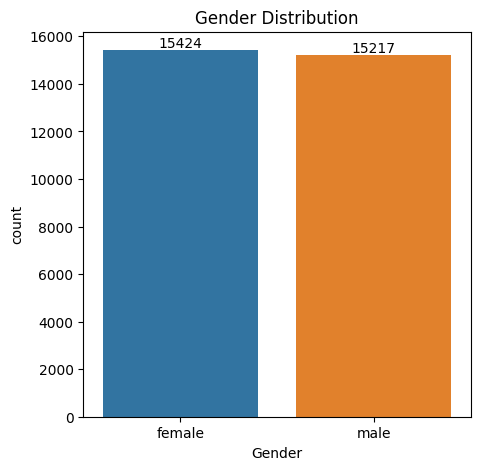

In [179]:
#Gender and its count
from matplotlib.pyplot import bar_label


plt.figure(figsize=(5,5))
visual=sns.countplot(data=df,x='Gender',hue='Gender', palette=['#1f77b4','#ff7f0e'],legend=False)
plt.title('Gender Distribution')

# Add labels to each bar
for container in visual.containers:
    visual.bar_label(container)

plt.show()


#from the above analaysis:
#the female is more than a male in a Academic Institue

In [180]:
gbl=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(gbl)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


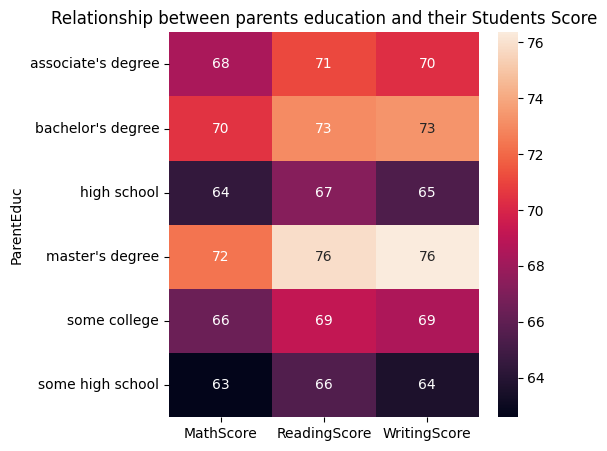

In [181]:
plt.figure(figsize=(5,5))
sns.heatmap(gbl,annot=True)
plt.title('Relationship between parents education and their Students Score')
plt.show()

#from the above analysis: It is concluded Parrents Edu background can have direct impact to their academic grade.

In [182]:
pa=df.groupby('ParentMaritalStatus').agg({'ReadingScore':'mean','WritingScore':'mean','MathScore':'mean'})
print(pa)

                     ReadingScore  WritingScore  MathScore
ParentMaritalStatus                                       
divorced                69.655011     68.799146  66.691197
married                 69.389575     68.420981  66.657326
single                  69.157250     68.174440  66.165704
widowed                 69.651438     68.563452  67.368866


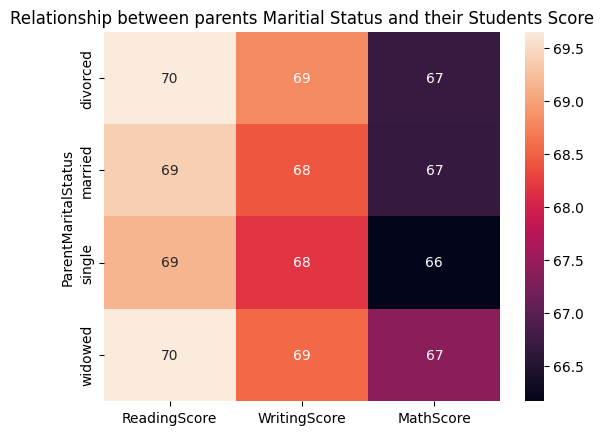

In [183]:
sns.heatmap(pa,annot=True)
plt.title('Relationship between parents Maritial Status and their Students Score')
plt.show()

#From the above chart it is concluded: parents marital status have a negligible impact on their study.

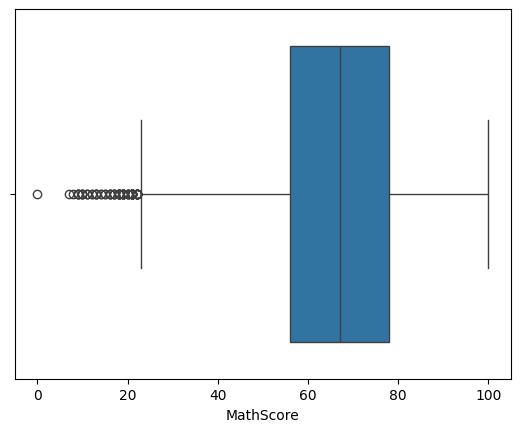

In [184]:
#basically from the below chart we can identify outliers
sns.boxplot(data=df,x='MathScore')
plt.show()

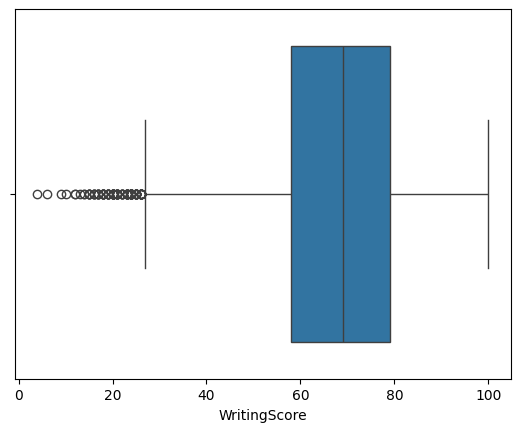

In [185]:
#basically from the below chart we can identify outliers
sns.boxplot(x='WritingScore',data=df)
plt.show()

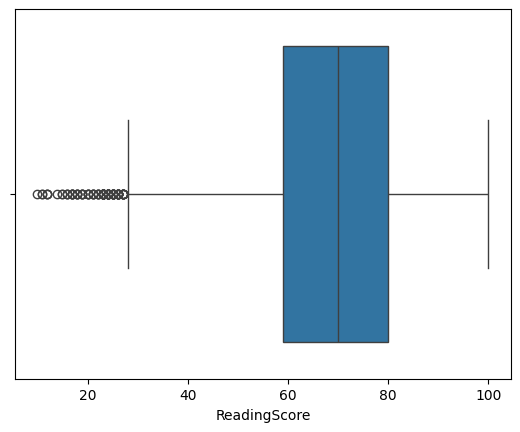

In [186]:
#basically from the below chart we can identify outliers
sns.boxplot(x='ReadingScore',data=df)
plt.show()

In [187]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[9212, 7503, 5826, 4041, 2219]


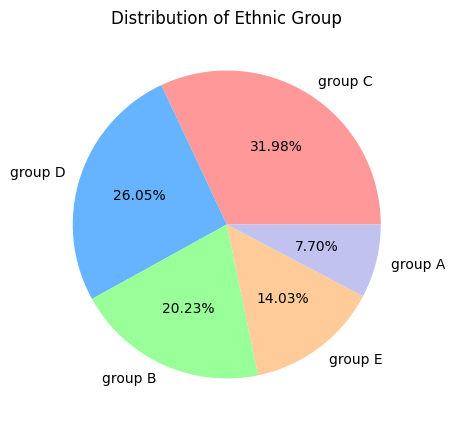

In [188]:
import matplotlib.pyplot as plt

#  df is your DataFrame and 'EthnicGroup' is the column you want to plot
ethnic_counts = df['EthnicGroup'].value_counts()

# List of ethnic group counts
my_list = ethnic_counts.tolist()
print(my_list)
# List of ethnic group labels
l = ethnic_counts.index.tolist()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(my_list, labels=l, autopct="%1.2f%%", colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Ethnic Group')
plt.show()


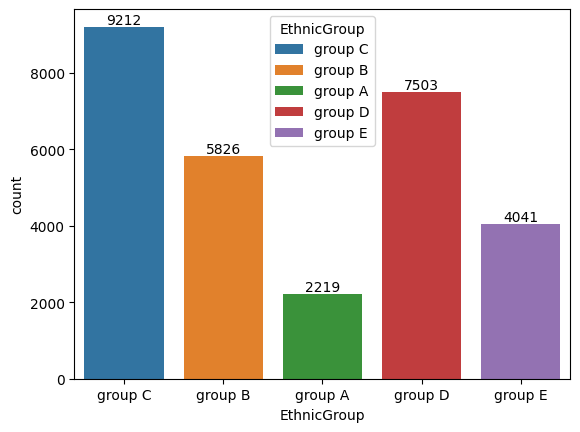

In [189]:
ax=sns.countplot(data=df,x='EthnicGroup',hue='EthnicGroup')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
    